__Eithar Elfatih Burie Abdelrahman DS2403__

# Restaurant Food Cost Project

__Project Description__

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

__Dataset Attributes__

    TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
    RESTAURANT_ID: A unique ID for each restaurant.
    CUISINES: The variety of cuisines that the restaurant offers.
    TIME: The open hours of the restaurant.
    CITY: The city in which the restaurant is located.
    LOCALITY: The locality of the restaurant.
    RATING: The average rating of the restaurant by customers.
    VOTES: The overall votes received by the restaurant.
    COST: The average cost of a two-person meal.




__________________________

# 1. Import necessary libraries

In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import re
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import skew, stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#read dataframe for train and test dataset from xl file 
test_p=r'C:\Users\eitha\OneDrive\Documents\data science\datatrained\flip robo internship\projects\8. Restaurant Food Cost\Data_Test.xlsx'
_test_=pd.read_excel(test_p)

train_p=r'C:\Users\eitha\OneDrive\Documents\data science\datatrained\flip robo internship\projects\8. Restaurant Food Cost\Data_Train.xlsx'
_train_=pd.read_excel(train_p)

__Test__

In [3]:
#create dataframe of csv
test_=pd.DataFrame(_test_)

#show dataset head 
test_.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
#show dataset head
test_.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


__________________________

In [5]:
# rpint train head
train_=pd.DataFrame(_train_)

train_.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
#print train tail 
train_.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


____

# 2 Reading data

__a. Head / Tail__

__Shape__

In [7]:
# show shapes of test nd trin 
print('The "Test" dataset has a shape:',test_.shape)
print('The "Train" dataset has a shape:',train_.shape)
print('The "Cost" column is absent in the Train dataset. In order to do a full and unbiased anlysis i will merge the test and train \n datasets, and resplit again later for training and testing.')

The "Test" dataset has a shape: (4231, 8)
The "Train" dataset has a shape: (12690, 9)
The "Cost" column is absent in the Train dataset. In order to do a full and unbiased anlysis i will merge the test and train 
 datasets, and resplit again later for training and testing.


__New Shape__

In [8]:
#merge datasets
df_=train_.append(test_)
print('After merging the datasets, the new shape is',df_.shape)
df_


After merging the datasets, the new shape is (16921, 9)


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


# 2b. INFO

In [9]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


# 2c. Duplicates

In [10]:
#indetify amount of duplicates
df_.duplicated().sum()

26

In [11]:
#show original shape
print('The original dataframe shape is:', df_.shape)

#drop duplicates
df_1=df_.drop_duplicates()

#print
print('\nThe new dataframe shape after dropping duplicates:',df_1.shape)


The original dataframe shape is: (16921, 9)

The new dataframe shape after dropping duplicates: (16895, 9)


# 2d Missing Values 

In [12]:
# sum of missing values in data set 
df_.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

In [13]:
#percentages of missing values 
df_.isnull().sum()/(len(df_))*100

TITLE             0.000000
RESTAURANT_ID     0.000000
CUISINES          0.000000
TIME              0.000000
CITY              0.868743
LOCALITY          0.756456
RATING            0.023639
VOTES             9.491165
COST             25.004432
dtype: float64

__As we can see above ['CITY'], ['LOCALITY'], ['RATING'] and ['VOTES'] all have nulls. I will inspect this further and decide how to deal with each__

"CITY" = 0.87%
"LOCALITY"=0.76%
- The above features are both of catergorical type and very low percentage is missing.Iwill first check the unique values then make a decicion as what to do  



In [14]:
# count number of unique values in these columns
u_city=df_['CITY'].nunique()
u_local=df_['LOCALITY'].nunique()
u_rate=df_['RATING'].nunique()
u_vote=df_['VOTES'].nunique()

# print unique value amounts 
print(f'The number of unique cities is :{u_city}')
print(f'The number of unique localities is :{u_local}')
print(f'The number of unique ratings is :{u_rate}')
print(f'The number of unique votes is :{u_vote}')


The number of unique cities is :450
The number of unique localities is :1636
The number of unique ratings is :32
The number of unique votes is :2075


# From the above:

.['CITY'] - we can see that their are 450 cities. This is a very high number and analysis would be difficult. I will check what is common and try to streamline this.

.['LOCALITY']- There is an even higher amount of localities, which again would be difficult to analysis and similar to city. therefore this will be dropped 

.['RATING']- rating seems to be from 1 to 5. with point intervals(eg.3.7), this number is reasonable. so i will fill in the nan values with the median.

['VOTES'] - This feature has a much higher percentage, so to be more accurate I will use the mean to fill in the missing values. the unique values are high, but this may help with analysis later on in the project.




__Fill null values for ['CITY']__

In [15]:
#fill in 'CITY' with mode 
city_m=df_['CITY'].mode()[0]
df_['CITY'].fillna(city_m, inplace=True)


In [16]:
# check common occurences 
df_['CITY'].value_counts().head(20)



Chennai          3002
Bangalore        2835
Hyderabad        2458
Mumbai           2311
New Delhi        1754
Kochi            1751
Gurgaon           524
Secunderabad      396
Noida             274
Navi Mumbai       222
Ghaziabad         132
Thane             118
Faridabad         109
Bandra West        85
Thane West         73
Andheri West       69
Bengaluru          61
Greater Noida      38
India              31
Kakkanad           20
Name: CITY, dtype: int64

In [17]:
#create a new dataframe to change
df_1=pd.DataFrame(df_)

i will start with th top 15 and see. after checking i fount the top 10 to be sufficient 

In [18]:
# from the above, i willl regroup them into 
top_15=['Chennai' , 'Bangalore','Hyderabad', 'Mumbai', 'Kochi', 'New Delhi', 'Gurgaon', 'Secunderabad', 'Noida', 'Ghaziabad','Thane']

for city in top_15:
    print(city)
    t_city=df_1[df_1.CITY.str.contains(city, na=False)].CITY.value_counts().index
    print(t_city)

df_1.CITY.replace(to_replace=t_city,value=city, inplace=True)

o_city=df_1[~df_1.CITY.str.contains('Chennai|Bangalore|Hyderabad|Mumbai|Kochi|New Delhi|Gurgaon|Secunderabad|Noida|Navi Mumbai|Ghaziabad|Thane|Faridabad|Bandra West|Thane West', na=False)].CITY.value_counts().index

df_1.CITY.replace(to_replace=o_city, value='Others', inplace=True)

Chennai
Index(['Chennai', 'Chennai.', 'Chennai Teynampet', 'Chennai Mahabalipuram',
       'Chennai Padur', 'Chennai Kovalam', 'Chennai Injambakkam',
       'T-Nagar Chennai', 'Balavinayagar Nagar Chennai', 'Chennai-600008',
       'Chennai Velachery', 'Chennai 600040', 'Chennai 40', 'Chennai 37',
       'Chennai (Above Bombay Brasserie)', 'Sholinganallur. Chennai',
       'Chennai. (Near Hotel Matshya)',
       'Chennai - 34 Landmark - Near Loyola College', 'Chennai Chrompet',
       'Chennai-40', 'Chennai 600034.', 'Chennai Opposite 5C Bus stand',
       'Chennai (Bang Opposite Indian Bank)', 'Chennai - 600040',
       'ECR NEELANKARAI Chennai 600115', 'Chennai- 600107',
       'Chennai Thousand Lights', 'Chennai Thuraipakkam', 'Chennai Perungudi',
       'Mogappair. Chennai', 'Chennai opp: Vasanth & co', 'Chennai - 600018'],
      dtype='object')
Bangalore
Index(['Bangalore', 'Bangalore.',
       'CPR layout harlur main road opposite to ozone ever green apartment Bangalore -',
     

In [19]:
for _city in top_15:
    df_1.loc[df_1['CITY'].str.contains(city, na=False), 'CITY' ]= city 

df_1.loc[~df_1['CITY'].isin(top_15), 'CITY']='Other'

df_1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [20]:
#this is more reasonable

In [21]:
df_1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY          128
RATING              4
VOTES            1606
COST             4231
dtype: int64

# RATING

In [22]:
#replCE NEW nd - with NAN 
#
df_1['RATING'].replace(['NEW', '-'],np.nan, inplace=True)
#
df_1['RATING']=pd.to_numeric(df_1['RATING'], errors='coerce')
#
rate_m=df_1['RATING'].median()

df_1['RATING'].fillna(rate_m,inplace=True)


In [23]:
#check change 
df_1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY          128
RATING              0
VOTES            1606
COST             4231
dtype: int64

# ['VOTES']

In [24]:
#extract numbers with regex
df_1['VOTES']=df_1['VOTES'].str.extract('(\d+)')
                           
# convert to numeric
df_1['VOTES']=pd.to_numeric(df_1['VOTES'], errors='coerce')
df_1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,NaN,NaN


In [25]:
df_1['VOTES'].isnull().value_counts()

False    15315
True      1606
Name: VOTES, dtype: int64

In [26]:
null_votes=df_1[df_1['VOTES'].isnull()]
null_votes

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),Kochi,Edappally,3.8,NaN,400.0
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),Kochi,Kalamassery,3.8,NaN,200.0
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),New Delhi,Kalkaji,3.8,NaN,200.0
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",Bangalore,Vijay Nagar,3.8,NaN,300.0
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",Mumbai,Borivali West,3.8,NaN,800.0
...,...,...,...,...,...,...,...,...,...
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),Noida,Sector 63,3.8,NaN,NaN
4185,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),New Delhi,Shalimar Bagh,3.8,NaN,NaN
4198,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),Bangalore,Indiranagar,3.8,NaN,NaN
4223,CASUAL DINING,6887,"Sindhi, Street Food","11:30am – 4pm, 7pm – 11:30pm (Mon-Sun)",Mumbai,Lower Parel,3.8,NaN,NaN


In [27]:
#fill in 'VOTES' with mode 
local_m=df_1['VOTES'].median()
df_1['VOTES'].fillna(local_m, inplace=True)

In [28]:
df_1['VOTES'].isnull().value_counts()

False    16921
Name: VOTES, dtype: int64

In [29]:
df_1.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0


In [30]:
df_1.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY          128
RATING              0
VOTES               0
COST             4231
dtype: int64

_______________________________

__2e  columns__

In [31]:
df_1.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

# 3. Feature Engineering/Transforming

__['TITLE']__

In [32]:
titles=list(df_1['TITLE'])

#find max number of titles 
max_= 1
for i in titles:
    if len(i.split(',')) > max_:
        max_=len(i.split(','))

print('\n\nMaximum Titles per restaurant:', max_)

all_titles=[]

for i in titles:
    if len(i.split(','))==1:
        all_titles.append(i.split(',')[0].strip().upper())
    else:
        for j in range(len(i.split(','))):
            all_titles.append(i.split(',')[j].strip().upper())

print('\n\nNumber of Unique titles:',len(pd.Series(all_titles).unique()))
print('\n\nunique Titles:/n', pd.Series(all_titles).unique())

all_titles=list(pd.Series(all_titles).unique())
    



Maximum Titles per restaurant: 2


Number of Unique titles: 25


unique Titles:/n ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


# As there is a large number of titles, to simplify this and make it more general, I will create a new column ['GROUP'] 

In [33]:
#create dictionary for title groups  
title_groups={}

#define regex patters for groups
groups_patterns={
    'Casual Dining': r'CASUAL DINING',
    'Quick Bites': r'QUICK BITES|FOOD TRUCK',
    'Cafe/Bakery': r'CAFÉ|BEVERAGE SHOP',
    'Bar/Pub/Lounge' : r'BAR|PUB|LOUNGE|COCKTAIL BAR|MICROBREWERY|COCKTAIL BAR', 
    'Dessert/sweet Treats': r'DESSERT PARLOR|SWEET SHOP|CONFECTIONERY|BAKERY', 
    'Fine Dining': r'FINE DINING',
    'Other': r'NONE |FOOD COURT|MESS|MEAT SHOP|MESS|PAAN SHOP|KIOSK|BHOJANALYA|MEAT SHOP|CLUB|IRANI CAFE|DHABA',
    
}
#iterate through names
for title in titles:
    if title == 'None':
         title_groups.setdefault('None',[]).append(title)
    else:
        matched =False
        for title_group, pattern in groups_patterns.items():
            if re.search(pattern, title, re.IGNORECASE):
                title_groups.setdefault(title_group,[]).append(title)
                matched=True 
                break
        if not matched:
            title_groups.setdefault('Other',[]).append(title)
#print to make sure 
for group, members in title_groups.items():
    print(f'{group}: {len(members)}')

Casual Dining: 5865
Quick Bites: 6177
Dessert/sweet Treats: 1082
Cafe/Bakery: 1245
Bar/Pub/Lounge: 512
None: 1287
Fine Dining: 407
Other: 346


In [34]:
# Create a mapping dictionary for titles to groups
title_to_group = {}
for title in titles:
    if title == 'None':
        title_to_group[title] = 'None'
    else:
        matched = False
        for title_group, pattern in groups_patterns.items():
            if re.search(pattern, title, re.IGNORECASE):
                title_to_group[title] = title_group
                matched = True
                break
        if not matched:
            title_to_group[title] = 'Other'

# Map 'TITLE' to 'GROUP' using the mapping dictionary
df_1['GROUP_'] = df_1['TITLE'].map(title_to_group)
df_1


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites


# ['CUISINES']

In [35]:
cuisines=list(df_1['CUISINES'])

#find max number of titles 
max_c= 1
for i in cuisines:
    if len(i.split(',')) > max_c:
        max_c=len(i.split(','))

print('\n\nMaximum cuisines per restaurant:', max_c)

all_cuisines=[]

for i in cuisines:
    if len(i.split(','))==1:
        all_cuisines.append(i.split(',')[0].strip().upper())
    else:
        for j in range(len(i.split(','))):
            all_cuisines.append(i.split(',')[j].strip().upper())

print('\n\nNumber of Unique cuisines:',len(pd.Series(all_cuisines).unique()))
print('\n\nunique cuisines:\n\n', pd.Series(all_cuisines).unique())

all_cusines=list(pd.Series(all_cuisines).unique())
    



Maximum cuisines per restaurant: 8


Number of Unique cuisines: 130


unique cuisines:

 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'


In [36]:
df_1['CUISINES'].value_counts().head(40)

North Indian                           716
North Indian, Chinese                  714
South Indian                           706
Fast Food                              364
Chinese                                226
Bakery, Desserts                       190
Bakery                                 187
South Indian, North Indian, Chinese    183
Cafe                                   181
Kerala                                 178
Biryani                                164
Street Food                            161
Chinese, North Indian                  149
North Indian, Mughlai                  147
South Indian, North Indian             135
North Indian, Chinese, Biryani         121
Desserts                               117
Finger Food                            113
North Indian, South Indian, Chinese    113
Bakery, Fast Food                      108
Ice Cream, Desserts                    108
Pizza, Fast Food                       103
North Indian, South Indian              99
Arabian    

In [37]:
#create dictionary for title groups  
cuisine_groups={}

#define regex patters for groups
cuisine_patterns={
   'Indian': r'MALWANI|GOAN|NORTH INDIAN|MODERN INDIAN|BIRYANI|HYDERABADI|SOUTH INDIAN|MUGHLAI|MAHARASHTRIAN|PARSI|ANDHRA|KERALA|INDIAN|GUJARATI|RAJASTHANI|CHETTINAD|NORTH EASTERN|BIHARI|BENGALI|LUCKNOWI|AWADHI|KONKAN|KASHMIRI|TAMIL|ASSAMESE|BOHRI|SINDHI|ORIYA|MITHAI|STREET FOOD',
    'Asian': r'ASIAN|JAPANESE|CHINESE|TIBETAN|THAI|INDONESIAN|KOREAN|NEPALESE|MALAYSIAN|VIETNAMESE|BURMESE|SUSHI|SINGAPOREAN|CANTONESE|HOT POT|PAN ASIAN|SATAY|DUMPLINGS|ORIENTAL|MONGOLIAN|PANINI|CHARCOAL CHICKEN|HAWAIIAN|RAW MEATS',
    'European': r'CONTINENTAL|EUROPEAN|ITALIAN|FRENCH|PORTUGUESE|SPANISH|RUSSIAN|BELGIAN|GERMAN|GREEK|BRITISH|IRISH',
    'Middle Eastern': r'ARABIAN|IRANIAN|LEBANESE|TURKISH|AFGHAN|PAKISTANI|JEWISH|FALAFEL|MOROCCAN|ARMENIAN|EGYPTIAN',
    'Western': r'MEXICAN|TEX-MEX|BRAZILIAN|PERUVIAN|SOUTH AMERICAN|PIZZA|BURGER|BAR FOOD|BBQ|STEAK|AMERICAN|HOT DOGS|ROAST CHICKEN|HOT DOGS|FUSION|MODERN AUSTRALIAN',
    'Desserts': r'DESSERTS|BAKERY|ICE CREAM|MITHAI|MISHTI|SWEET SHOP|CONFECTIONERY',
    'Cafe/Beverages': r'CAFE|COFFEE|TEA|BEVERAGES|JUICES|BUBBLE TEA|COFFEE AND TEA|CAFÉ',
    'Other Cuisines': r'ROLLS|FAST FOOD|SANDWICH|WRAPS|GRILL|FINGER FOOD|PAAN|FOOD TRUCK|HEALTHY FOOD|SALAD|VEGAN|FISH AND CHIPS',
}
#
#iterate through names
for cuisine in cuisines:
    matched =False
    for cuisine_group, pat in cuisine_patterns.items():
        if re.search(pat, cuisine, re.IGNORECASE):
            cuisine_groups.setdefault(cuisine_group,[]).append(cuisine)
            matched=True 
            break
    if not matched:
        cuisine_groups.setdefault('Other Cuisines',[]).append(cuisine)
#print to make sure 
for group, members in cuisine_groups.items():
    print(f'{group}: {len(members)}')

Indian: 10504
Asian: 1390
Desserts: 1513
Western: 638
European: 1157
Cafe/Beverages: 726
Middle Eastern: 247
Other Cuisines: 746


In [38]:
# make a diction to map titles to groups
cuisine_to_group={}

for cuisine in cuisines:
    if cuisine == 'None':
        cuisine_to_group[cuisine] = 'None'
    else:
        matched = False
        for cuisine_group, pat in cuisine_patterns.items():
            if re.search(pat, cuisine, re.IGNORECASE):
                cuisine_to_group[cuisine]= cuisine_group
                matched = True 
                break 
        if not matched:
                cuisine_to_group[cuisine] = 'Other Cuisines'
                
#map
df_1['TYPE_'] = df_1['CUISINES'].map(cuisine_to_group)

df_1 

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining,Indian
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None,Indian
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites,Indian
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages


# ['TIME']

split TIME

In [39]:
def adjust_time_format(time_string):
    # Handle invalid time string
    if 'invalid' in time_string.lower():
        return time_string
    
    # Remove extra characters
    time_string = re.sub(r'\s+', ' ', time_string).strip()

    #function to format single times
    def format_single_time(match):
        hour = int(match.group(1))
        period = match.group(2)
        return f"{hour:02}:{match.group(2).replace('NOON', '00PM').replace('MIDNIGHT', '00AM')}"

    # Standardize single time points
    time_string = re.sub(r'(\d{1,2})(\s*AM|\s*PM)', format_single_time, time_string)

    # function to format time ranges
    def format_time_range(match):
        start_hour = match.group(1).zfill(2)
        start_minute = match.group(2) if match.group(2) else '00'
        start_period = match.group(3)
        end_hour = match.group(4).zfill(2)
        end_minute = match.group(5) if match.group(5) else '00'
        end_period = match.group(6) if match.group(6) else start_period

        # Check AM/PM mentioned only once
        if not end_period:
            end_period = start_period

        start_time = f"{start_hour}:{start_minute}{start_period}"
        end_time = f"{end_hour}:{end_minute}{end_period}"
        return f"{start_time}-{end_time}"

    # Apply
    time_string = re.sub(r'(\d{1,2}):?(\d{2})?\s*-\s*(\d{1,2}):?(\d{2})?\s*(AM|PM)?', format_time_range, time_string)
    
    return time_string

# show
df_1['TIME'] = df_1['TIME'].astype(str).apply(adjust_time_format)
df_1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining,Indian
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None,Indian
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites,Indian
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages


In [40]:
def extract_time_and_days(time_string):
    # Handle time format
    if 'invalid' in time_string.lower():
        return pd.Series([None, None])

    # Remove extra characters/ spaces
    time_string = re.sub(r'\s+', ' ', time_string).strip()

    # Extract days part
    days_match = re.search(r'\((.*?)\)', time_string)
    days = days_match.group(1) if days_match else 'UNKNOWN'

    # Remove days from time string
    time_string = re.sub(r'\(.*?\)', '', time_string).strip()
    
    # format time ranges
    def format_time_range(match):
        start_hour, start_minute, start_period, end_hour, end_minute, end_period = match.groups()

        # Handle missing minutes
        start_minute = start_minute or '00' 
        end_minute = end_minute or '00'

        # Handle missing or inconsistent AM/PM
        start_period = start_period.upper() if start_period else 'AM'
        end_period = end_period.upper() if end_period else start_period
        
        # Convert 12 AM/PM to 00 AM/PM
        if start_hour == '12' and start_period == 'AM':
            start_hour = '00'
        if end_hour == '12' and end_period == 'AM':
            end_hour = '00'

        start_time = f"{int(start_hour):02d}:{start_minute}{start_period}"
        end_time = f"{int(end_hour):02d}:{end_minute}{end_period}"

        return f"{start_time}-{end_time}"

    # Apply 
    time_string = re.sub(
        r"(\d{1,2})(?::(\d{2}))?\s*([APap][Mm])?\s*(?:-|\s*to\s*)(\d{1,2})(?::(\d{2}))?\s*([APap][Mm])?", 
        format_time_range, 
        time_string, 
        flags=re.IGNORECASE
    )

    return pd.Series([time_string, days])

# Apply 
df_1[['TIME_', 'OPEN_']] = df_1['TIME'].astype(str).apply(extract_time_and_days)

# Print
df_1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining,Indian,11:30am – 11:30pm,Mon-Sun
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None,Indian,11am – 1am,Mon-Sun
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites,Indian,9:30am – 10:30pm,Mon-Sun
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages,"11am – 11:30pm , 3pm...","Mon, Tue, Wed, Thu, Sat, Sun"


In [41]:
# Calculates total open hours from multiple time ranges.
def calculate_open_hours(time_str):
    time_str = str(time_str).strip().lower()
    total_hours = 0
    
    if pd.isnull(time_str) or time_str == 'None' or time_str.strip() == '':
        return 0  # Handle missing, 'None', or empty values
    if "24 hours" in time_str.lower():
        return 24

    # Split into separate time ranges
    time_ranges = time_str.split(',')

    for time_range in time_ranges:
        time_parts = time_range.strip().split(' – ')
        
        if len(time_parts) != 2:
            total_hours += 1
            continue
        
        try:
            # seconds and minutes
            start_time = datetime.strptime(time_parts[0].strip(), '%I:%M:%S%p')
            end_time = datetime.strptime(time_parts[1].strip(), '%I:%M:%S%p')
        except ValueError:
            try:
                #  just minutes
                start_time = datetime.strptime(time_parts[0].strip(), '%I:%M%p')
                end_time = datetime.strptime(time_parts[1].strip(), '%I:%M%p')
            except ValueError:
                try: 
                    #  without minutes
                    start_time = datetime.strptime(time_parts[0].strip(), '%I%p')
                    end_time = datetime.strptime(time_parts[1].strip(), '%I%p')
                except ValueError:
                    continue  

        # Handle overnight hours
        if end_time < start_time:
            end_time += timedelta(days=1)

        total_hours += (end_time - start_time).total_seconds() / 3600

    return min(round(total_hours, 1), 24) 

# Apply 
df_1['HOURS_OPEN_'] = df_1['TIME_'].astype(str).apply(calculate_open_hours)

# show
df_1


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun,9.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun,5.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun,4.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun,0.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining,Indian,11:30am – 11:30pm,Mon-Sun,12.0
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None,Indian,11am – 1am,Mon-Sun,14.0
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites,Indian,9:30am – 10:30pm,Mon-Sun,13.0
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages,"11am – 11:30pm , 3pm...","Mon, Tue, Wed, Thu, Sat, Sun",1.0


In [42]:
def day_category(days_):
    days_=days_.strip().lower()
    if 'mon-sun' in days_:
        return 'Everyday'
    elif 'mon - fri' in days_:
        return 'Weekdays'
    elif 'sat-sun' in days_ or 'sat, sun' in days_:
        return 'Weekends'
    elif 'None' in days_:
        return 'Unknown'
    else:
        return 'Partial Week'
    
#apply 
df_1['DAYS_']=df_1['TIME'].apply(day_category)
df_1['DAYS_'].value_counts()

Everyday        14430
Partial Week     2072
Weekends          419
Name: DAYS_, dtype: int64

In [43]:
df_1

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun,9.0,Everyday
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun,5.0,Everyday
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun,4.0,Everyday
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun,0.0,Everyday
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun,14.0,Everyday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287.0,NaN,Casual Dining,Indian,11:30am – 11:30pm,Mon-Sun,12.0,Everyday
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469.0,NaN,None,Indian,11am – 1am,Mon-Sun,14.0,Everyday
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Other,Sector 86,3.7,53.0,NaN,Quick Bites,Indian,9:30am – 10:30pm,Mon-Sun,13.0,Everyday
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages,"11am – 11:30pm , 3pm...","Mon, Tue, Wed, Thu, Sat, Sun",1.0,Weekends


_____________

# 4. Data Reduction 

In [44]:
df_1.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_',
       'HOURS_OPEN_', 'DAYS_'],
      dtype='object')

In [45]:
#show difference
print('Orignial DataFrame:')
df_1.head(10)

Orignial DataFrame:


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun,9.0,Everyday
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun,5.0,Everyday
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun,4.0,Everyday
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun,0.0,Everyday
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun,14.0,Everyday
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30:AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550.0,800.0,Casual Dining,Indian,12noon – 12:30:AM,Mon-Sun,0.0,Everyday
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509.0,600.0,Cafe/Bakery,Indian,12noon – 11:30pm ...,"Mon, Tue, Thu, Fri, Sat, Sun",0.0,Weekends
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612.0,1600.0,Bar/Pub/Lounge,Western,1pm – 1am,Mon-Sun,12.0,Everyday
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101.0,300.0,Quick Bites,Indian,7am – 10:30pm,Mon-Sun,0.0,Everyday
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219.0,200.0,Quick Bites,Indian,"11am – 2pm, 4pm – 10:30pm",Mon-Sun,3.0,Everyday


i now have ten columns... 

    TITLE	RESTAURANT_ID	CUISINES	TIME		LOCALITY	 for now i will drop these and continue. if neccessary i will drop others if i find they are of not much use to analysis

__4a. Drop columns__

In [46]:
#drop unwanted columns
df_11 = df_1.drop(['TITLE','RESTAURANT_ID','CUISINES', 'TIME',  'LOCALITY'], axis=1)

print('\nDataFrame after dropping unwanted columns:')
df_1.head(10)



DataFrame after dropping unwanted columns:


,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun,9.0,Everyday
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun,5.0,Everyday
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun,4.0,Everyday
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun,0.0,Everyday
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun,14.0,Everyday
5,CASUAL DINING,5618,"North Indian, Chinese, Seafood, Biryani",12noon – 12:30:AM (Mon-Sun),Mumbai,Vile Parle West,4.0,550.0,800.0,Casual Dining,Indian,12noon – 12:30:AM,Mon-Sun,0.0,Everyday
6,CAFÉ,4383,"Cafe, Chinese, Pizza, North Indian, Burger","12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...",Bangalore,Koramangala 6th Block,4.1,509.0,600.0,Cafe/Bakery,Indian,12noon – 11:30pm ...,"Mon, Tue, Thu, Fri, Sat, Sun",0.0,Weekends
7,MICROBREWERY,1249,Bar Food,1pm – 1am (Mon-Sun),Gurgaon,Sector 29,4.3,1612.0,1600.0,Bar/Pub/Lounge,Western,1pm – 1am,Mon-Sun,12.0,Everyday
8,QUICK BITES,7062,"South Indian, North Indian",7am – 10:30pm (Mon-Sun),Bangalore,Bannerghatta Road,3.9,101.0,300.0,Quick Bites,Indian,7am – 10:30pm,Mon-Sun,0.0,Everyday
9,QUICK BITES,10109,North Indian,"11am – 2pm, 4pm – 10:30pm (Mon-Sun)",Hyderabad,Dilsukhnagar,3.3,219.0,200.0,Quick Bites,Indian,"11am – 2pm, 4pm – 10:30pm",Mon-Sun,3.0,Everyday


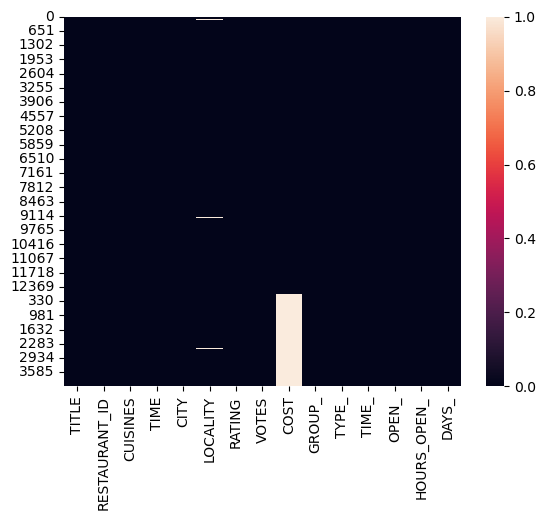

In [47]:

nulls_=df_1.isna()
sns.heatmap(nulls_)
plt.show()

_______________

# 5. Graphical analysis

__Univariate Analysis__

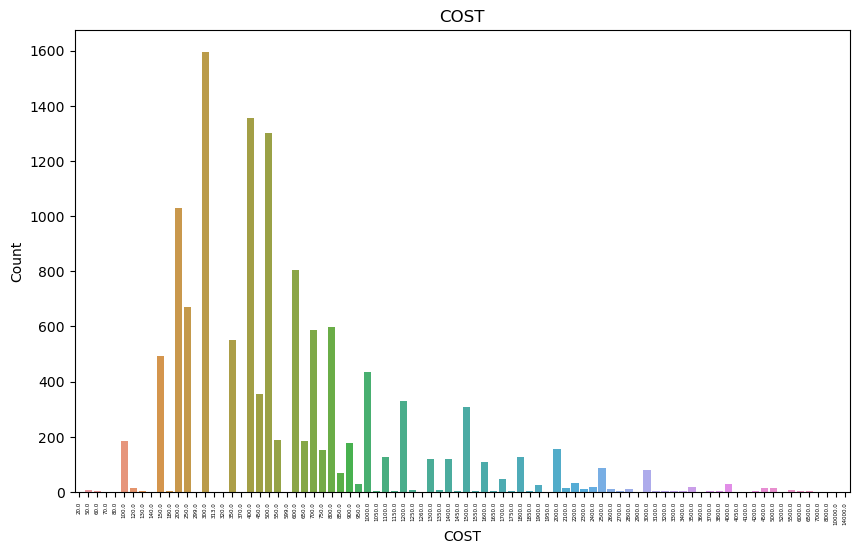

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='COST',data=df_1)
plt.xlabel('COST')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=4)
plt.title('COST')

plt.show()

     ['COST'] 
        - high positive skewness      
        - suggests majority of restaurants in data set have lower price meals will very few have very high cost
        - right skewness sugguests meal cost imbalance(very uncommon to find very high cost meals)

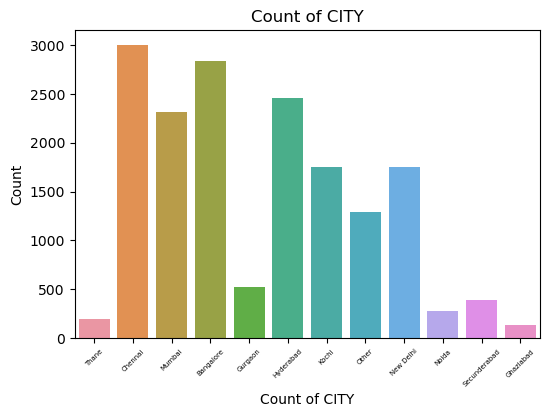

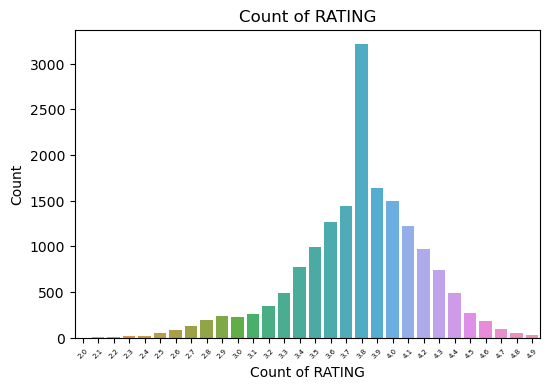

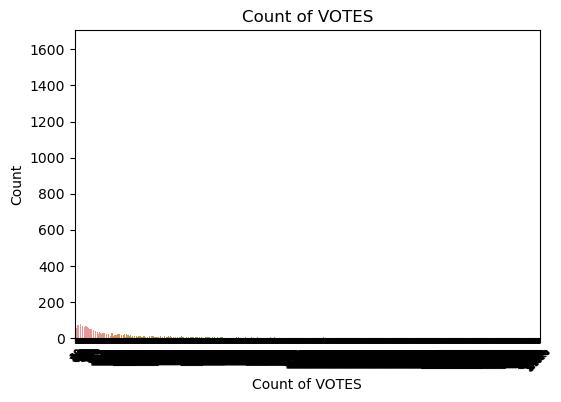

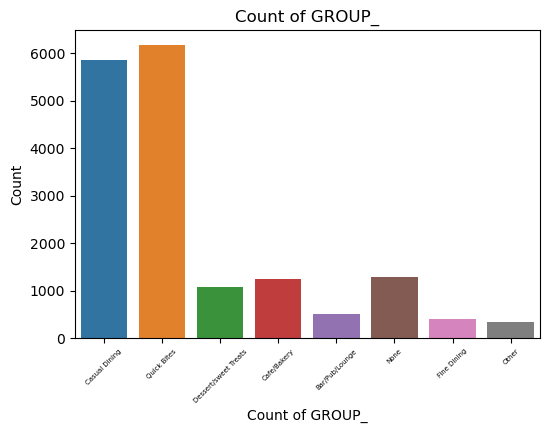

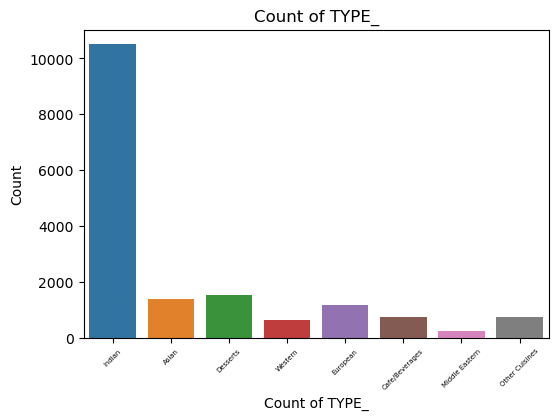

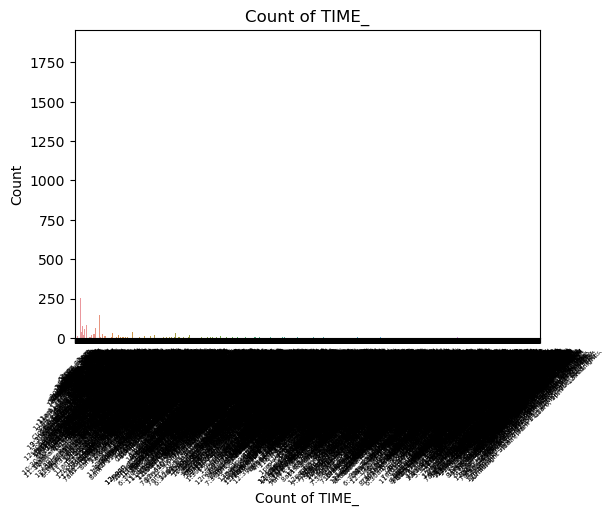

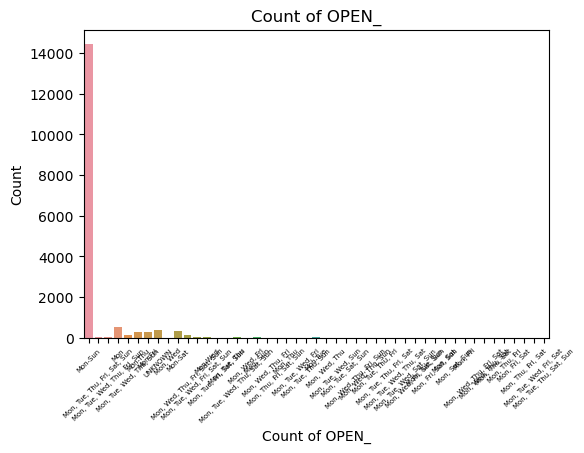

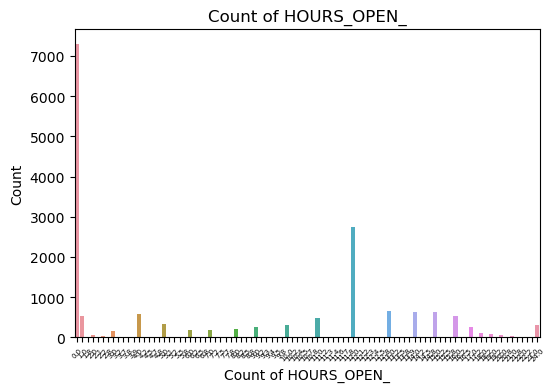

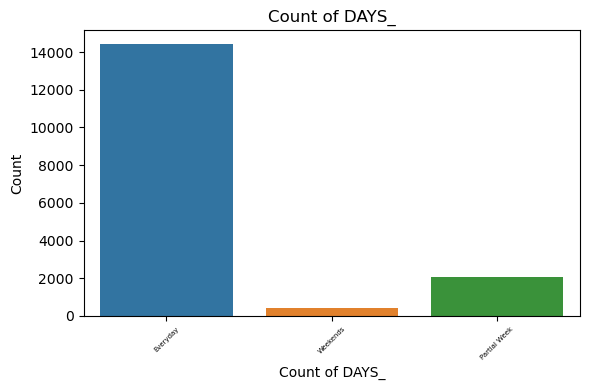

In [49]:
#categorical columns
cat_columns=['CITY', 'RATING', 'VOTES', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_',
       'HOURS_OPEN_', 'DAYS_']


for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df_1)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xlabel(f'Count of {col}')
    
    plt.xticks(rotation=45, fontsize=5)

plt.tight_layout()
    
plt.show()
    
   

comment*********************************************

__Bivariate Analysis__

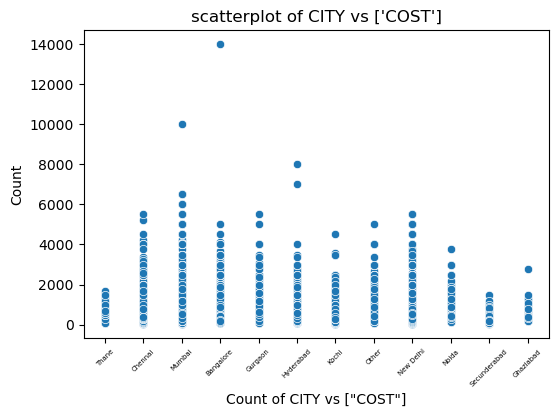

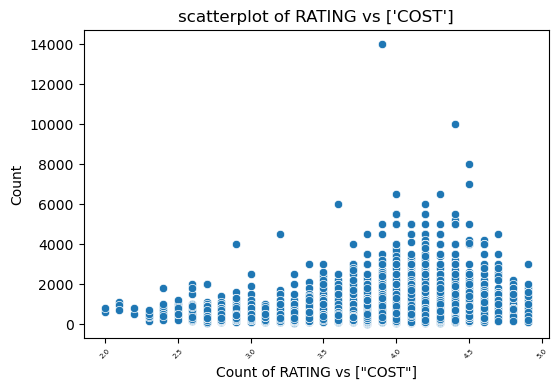

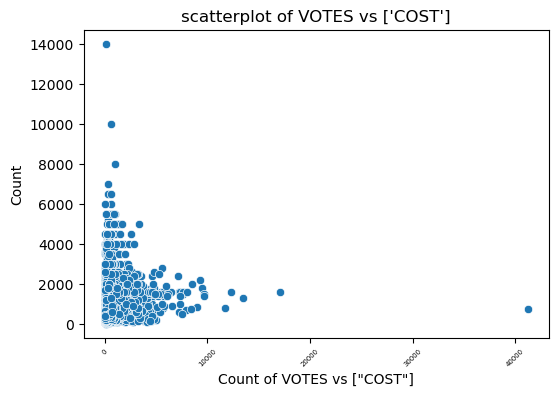

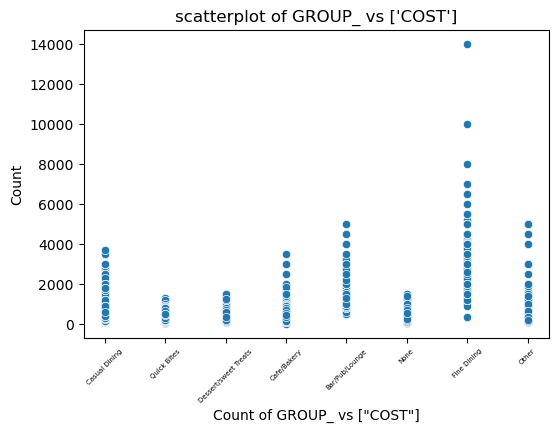

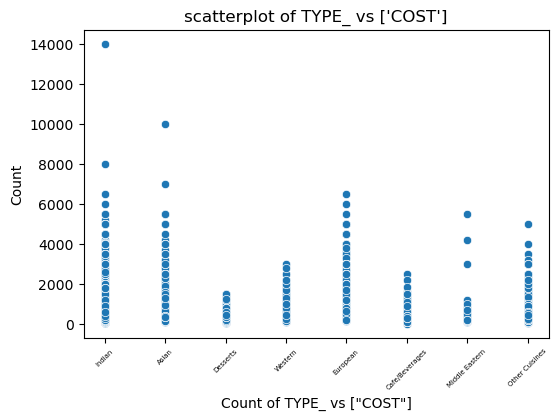

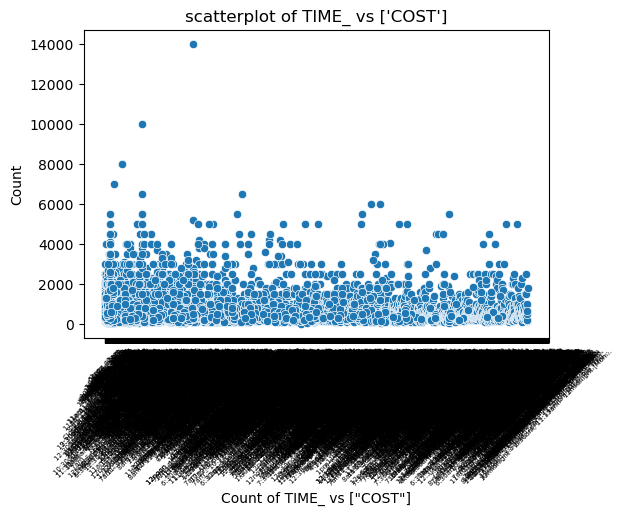

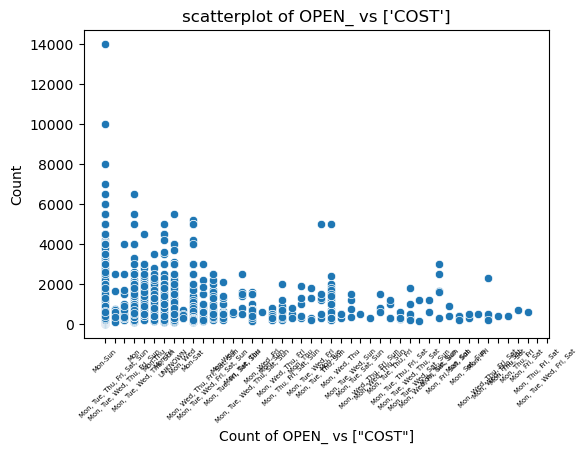

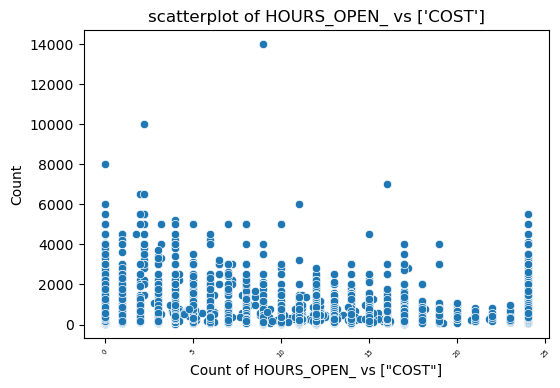

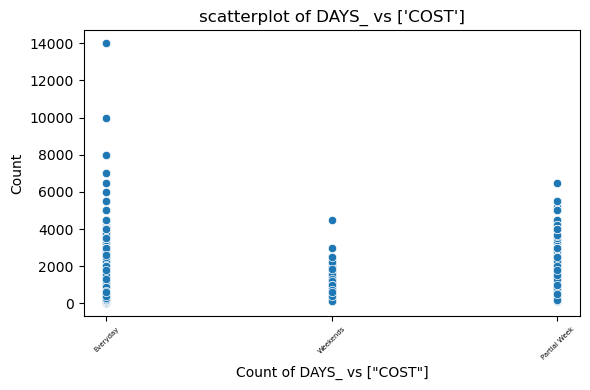

In [50]:
for col in cat_columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='COST', data=df_1)
    plt.title(f"scatterplot of {col} vs ['COST']")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xlabel(f'Count of {col} vs ["COST"]')
    
    plt.xticks(rotation=45, fontsize=5)

plt.tight_layout()
    
plt.show()
    

observations:
    
    ['CITY_encoded'] 
        - few outliers 
        - fairly balanced range 0f cost distribution  across 
        
    ['RATING'] 
        - moderately left-skewed
        - most restaurants have higher ratings, while few have low ratings
        -suggests fairly balanced distribution 
   
    ['VOTES'] 
        - Highly positively skewed
        - shows that the amount of votes per restaurant isnt very high for the majority, but many for the few
        - suggests high imbalance (small number of popular restaurants dominant vote counts 

    ['GROUP_'] 
        - close to zero skewness
        - sugguests even distribution   

    ['TYPE_'] 
        - highly negatively skewed 
        - majority restaurants in datsset have a specific cuisine type/s
        - strong imbalance 
        
    ['TIME_'] 
        - fairly positive skewness
        - seems majority of restaurants have similart opening times
        - fairly even distribution with slight right skewness
        

    ['OPEN_'] 
        - 
        - 
        - 
        
    ['HOURS_OPEN_'] 
        - 
        - 
        - 
          
    ['DAYS_'] 
        - 
        - 
        - 
      

       

               

observations:
    
    ['CITY_'] 
        - skewness close to zero
        - indicates fairly balanced distribution  
        
    ['RATING'] 
        - moderately left-skewed
        - most restaurants have higher ratings, while few have low ratings
        -suggests fairly balanced distribution 
   
    ['VOTES'] 
        - Highly positively skewed
        - shows that the amount of votes per restaurant isnt very high for the majority, but many for the few
        - suggests high imbalance (small number of popular restaurants dominant vote counts 

    ['GROUP_'] 
        - close to zero skewness
        - sugguests even distribution   

    ['TYPE_'] 
        - highly negatively skewed 
        - majority restaurants in datsset have a specific cuisine type/s
        - strong imbalance 
        
    ['TIME_'] 
        - fairly positive skewness
        - seems majority of restaurants have similart opening times
        - fairly even distribution with slight right skewness
        

       

               

_________

In [51]:
df_1.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_',
       'HOURS_OPEN_', 'DAYS_'],
      dtype='object')

In [52]:
drop_list=['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME','LOCALITY']
df_1=df_1.drop(columns=drop_list)
df_1

,CITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_
0,Thane,3.6,49.0,1200.0,Casual Dining,Indian,"11am – 4pm, 7:30pm – 11:30pm",Mon-Sun,9.0,Everyday
1,Chennai,4.2,30.0,1500.0,Casual Dining,Indian,6pm – 11pm,Mon-Sun,5.0,Everyday
2,Chennai,3.8,221.0,800.0,Casual Dining,Indian,"11am – 3:30pm, 7pm – 11pm",Mon-Sun,4.0,Everyday
3,Mumbai,4.1,24.0,800.0,Quick Bites,Asian,11:30am – 1am,Mon-Sun,0.0,Everyday
4,Mumbai,3.8,165.0,300.0,Dessert/sweet Treats,Desserts,11am – 1am,Mon-Sun,14.0,Everyday
...,...,...,...,...,...,...,...,...,...,...
4226,New Delhi,3.9,287.0,NaN,Casual Dining,Indian,11:30am – 11:30pm,Mon-Sun,12.0,Everyday
4227,Bangalore,4.3,469.0,NaN,None,Indian,11am – 1am,Mon-Sun,14.0,Everyday
4228,Other,3.7,53.0,NaN,Quick Bites,Indian,9:30am – 10:30pm,Mon-Sun,13.0,Everyday
4229,Kochi,3.8,164.0,NaN,Quick Bites,Cafe/Beverages,"11am – 11:30pm , 3pm...","Mon, Tue, Wed, Thu, Sat, Sun",1.0,Weekends


In [53]:
encode_cols=['CITY', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_', 'DAYS_']

In [54]:
#encoding # Initialize label encoders

label_encoder=LabelEncoder()

for col in encode_cols:

    # Fit and transform the 'CITY' column
    df_1[col] = label_encoder.fit_transform(df_1[col]).astype(str)

In [55]:
df_11=df_1.astype(float)
df_11

,CITY,RATING,VOTES,COST,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_
0,11.0,3.6,49.0,1200.0,2.0,4.0,838.0,42.0,9.0,0.0
1,1.0,4.2,30.0,1500.0,2.0,4.0,2170.0,42.0,5.0,0.0
2,1.0,3.8,221.0,800.0,2.0,4.0,745.0,42.0,4.0,0.0
3,6.0,4.1,24.0,800.0,7.0,0.0,315.0,42.0,0.0,0.0
4,6.0,3.8,165.0,300.0,3.0,2.0,685.0,42.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4226,7.0,3.9,287.0,NaN,2.0,4.0,260.0,42.0,12.0,0.0
4227,0.0,4.3,469.0,NaN,5.0,4.0,685.0,42.0,14.0,0.0
4228,9.0,3.7,53.0,NaN,7.0,4.0,2759.0,42.0,13.0,0.0
4229,5.0,3.8,164.0,NaN,7.0,1.0,569.0,28.0,1.0,2.0


move  'COST' to the end of the tble as this is the target variable

In [56]:
cols_=['CITY', 'RATING', 'VOTES', 'COST', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_',
       'HOURS_OPEN_', 'DAYS_']

move_col= 'COST'

cols_.remove(move_col)

cols_.append(move_col)

df_11=df_11[cols_]

df_11.head()

,CITY,RATING,VOTES,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_,COST
0,11.0,3.6,49.0,2.0,4.0,838.0,42.0,9.0,0.0,1200.0
1,1.0,4.2,30.0,2.0,4.0,2170.0,42.0,5.0,0.0,1500.0
2,1.0,3.8,221.0,2.0,4.0,745.0,42.0,4.0,0.0,800.0
3,6.0,4.1,24.0,7.0,0.0,315.0,42.0,0.0,0.0,800.0
4,6.0,3.8,165.0,3.0,2.0,685.0,42.0,14.0,0.0,300.0


In [57]:
df_11.dtypes

CITY           float64
RATING         float64
VOTES          float64
GROUP_         float64
TYPE_          float64
TIME_          float64
OPEN_          float64
HOURS_OPEN_    float64
DAYS_          float64
COST           float64
dtype: object

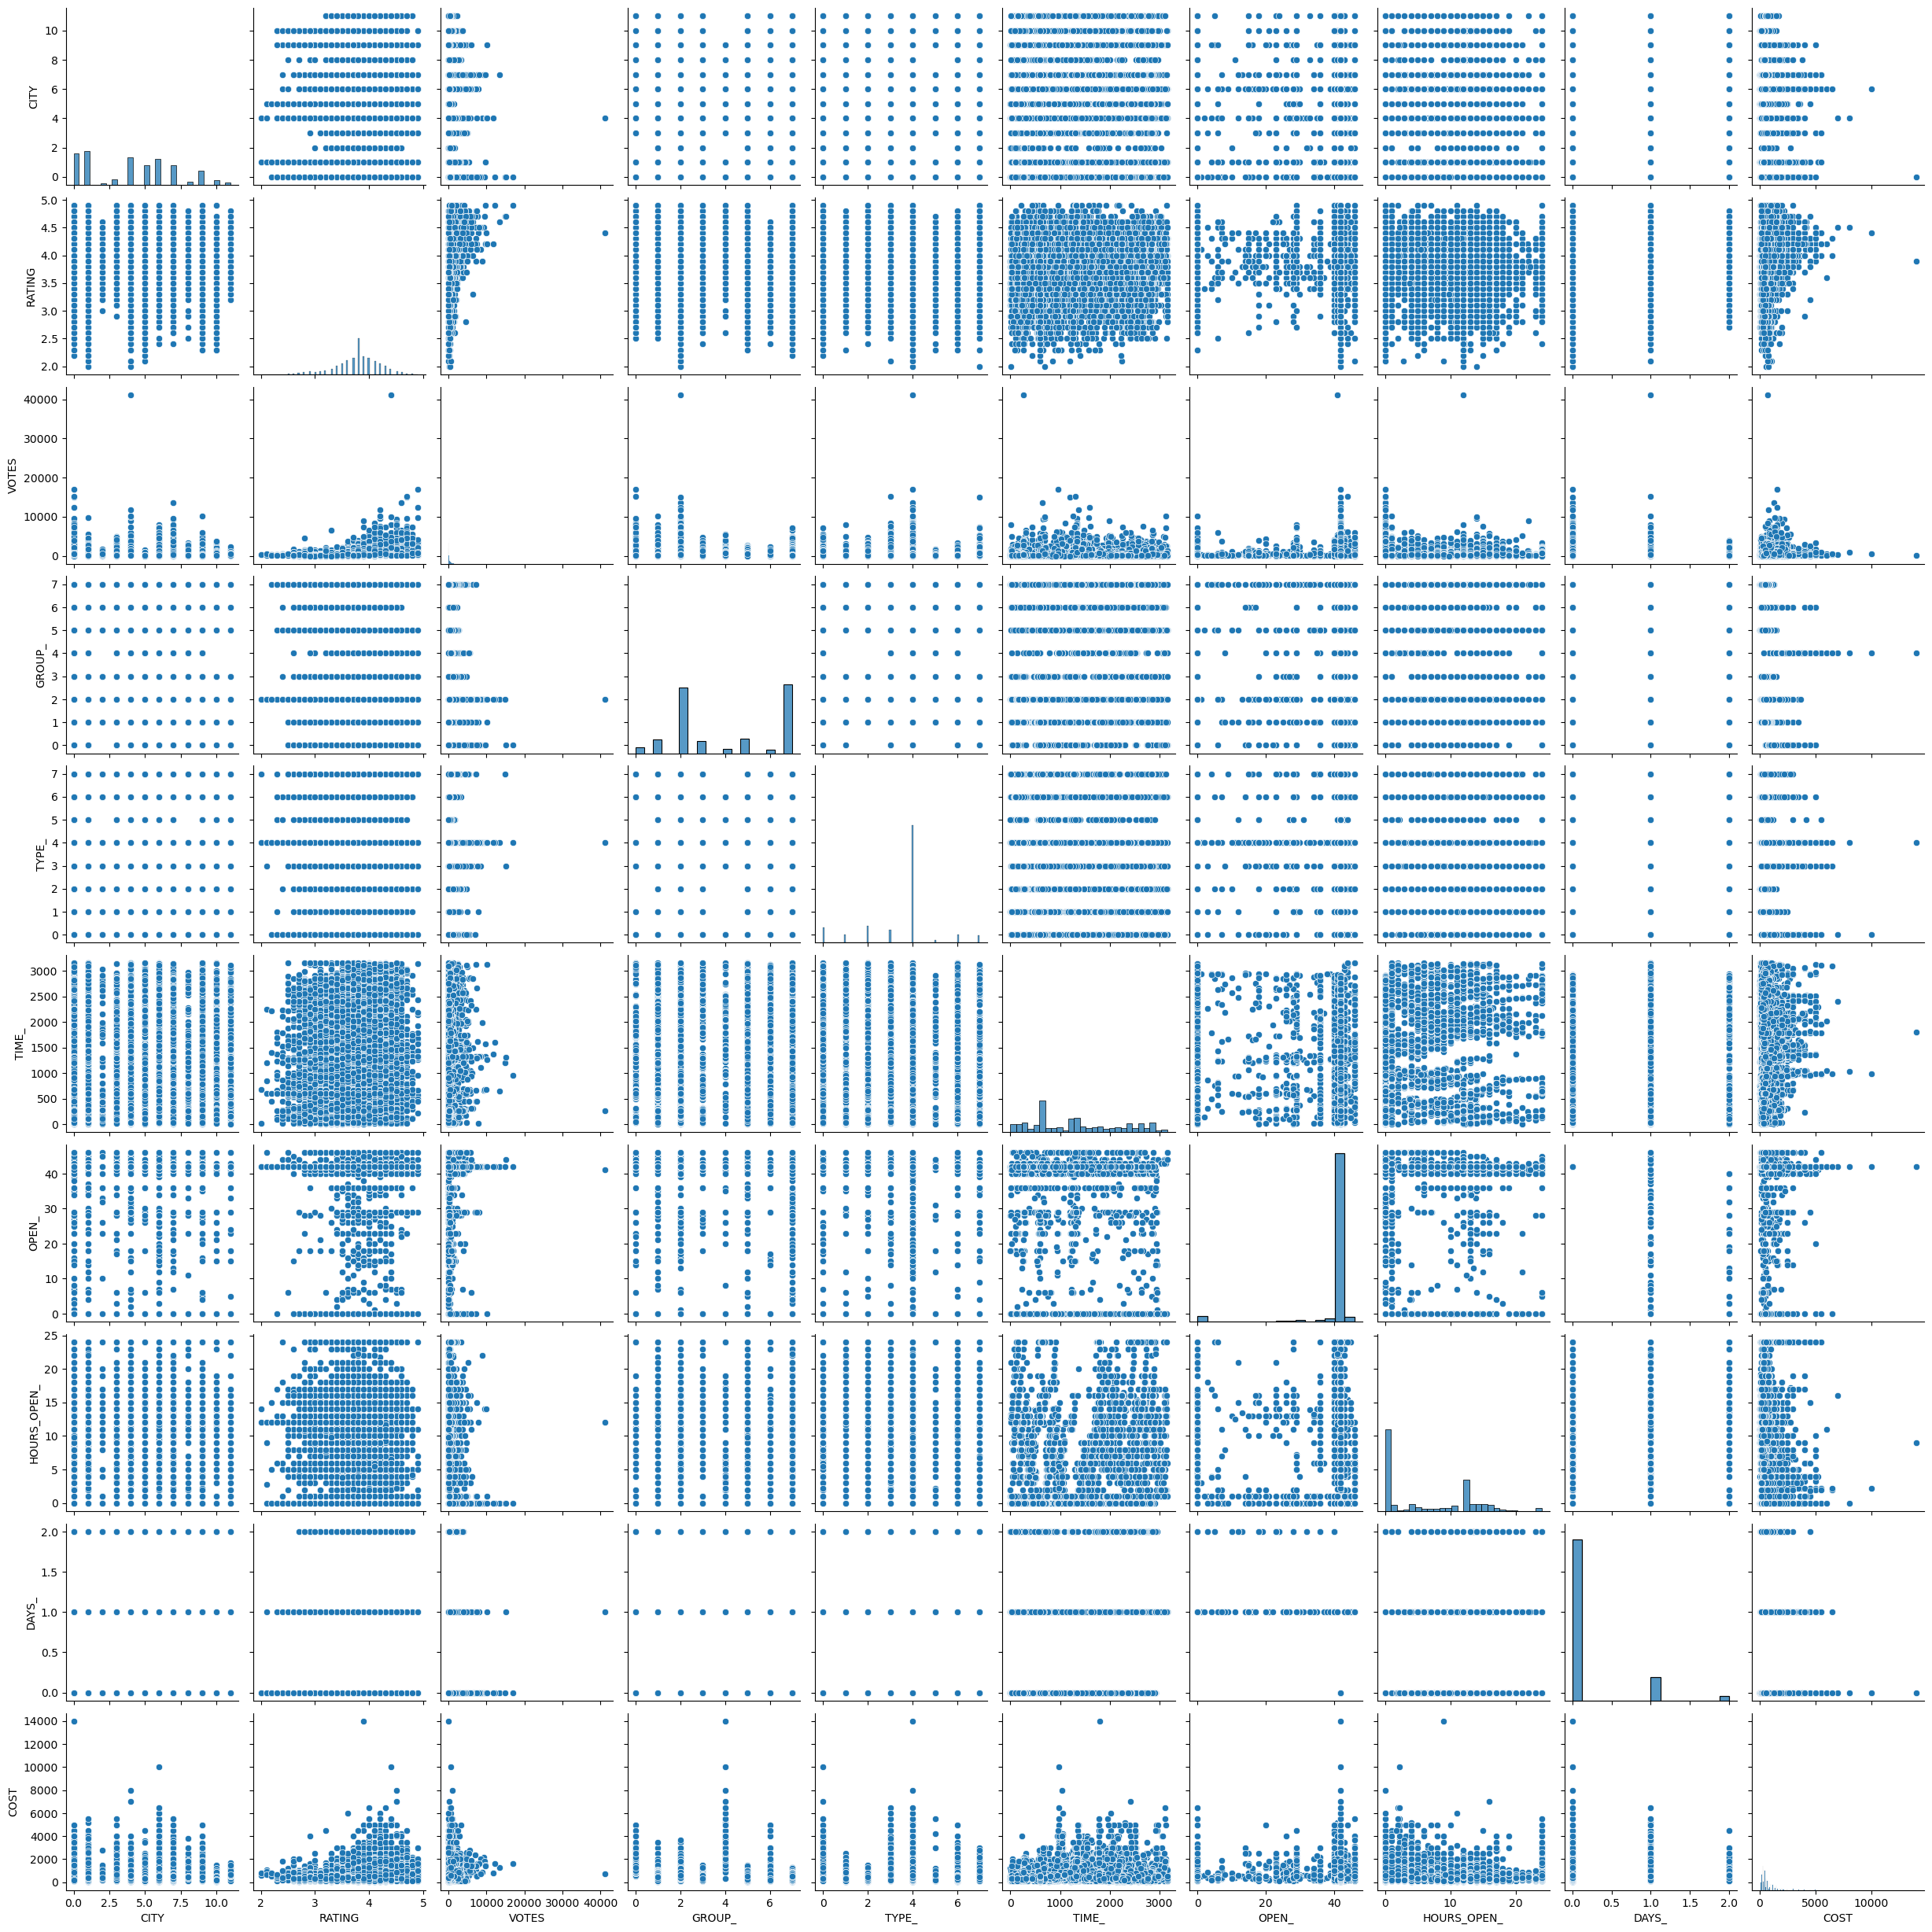

In [58]:
sns.pairplot(df_11)
plt.show()

# 6. Statistical Summary 

In [59]:
df_11.describe()

,CITY,RATING,VOTES,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_,COST
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,12690.000000
mean,4.105372,3.785946,394.973347,4.113173,3.511376,1354.737131,40.232847,6.401011,0.171976,655.252246
std,3.079359,0.404291,802.553722,2.455108,1.555058,887.216039,7.931662,6.750623,0.438105,627.003540
min,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1.000000,3.600000,64.000000,2.000000,3.000000,596.000000,42.000000,0.000000,0.000000,300.000000
50%,4.000000,3.800000,164.000000,3.000000,4.000000,1261.000000,42.000000,4.000000,0.000000,500.000000
75%,6.000000,4.000000,409.000000,7.000000,4.000000,2136.000000,42.000000,12.000000,0.000000,800.000000
max,11.000000,4.900000,41186.000000,7.000000,7.000000,3150.000000,46.000000,24.000000,2.000000,14000.000000


In [60]:
#check skewness
skewness=df_11.skew()
sorted_=skewness.sort_values()
sorted_


OPEN_          -4.485341
TYPE_          -0.572630
RATING         -0.564792
GROUP_          0.087068
CITY            0.169769
TIME_           0.339028
HOURS_OPEN_     0.505183
DAYS_           2.574469
COST            3.978801
VOTES          12.936797
dtype: float64

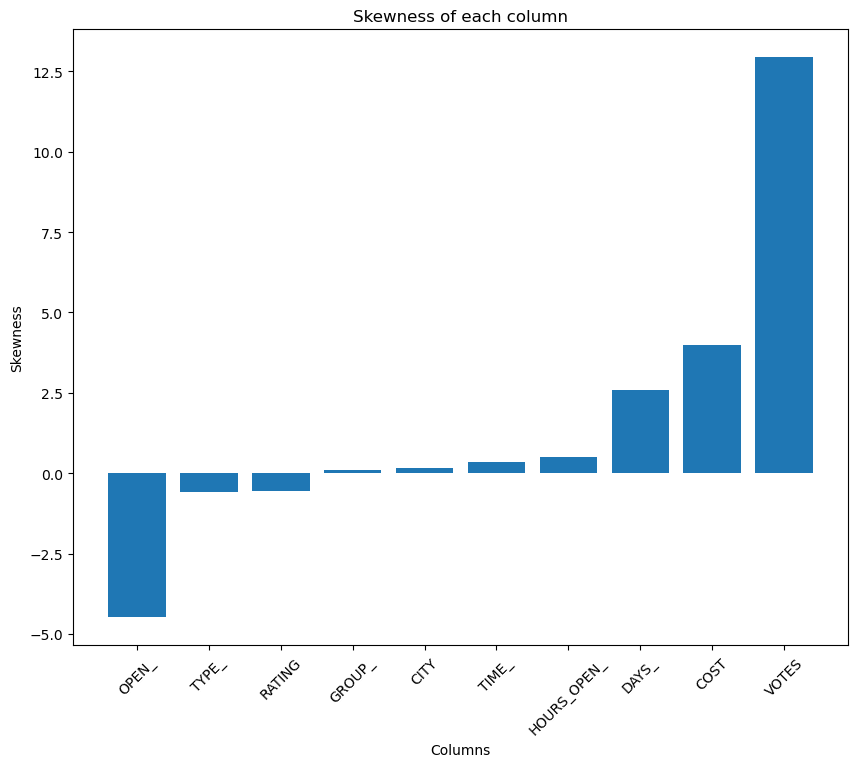

In [61]:
plt.figure(figsize=(10,8))
plt.bar(sorted_.index, sorted_.values)
plt.title('Skewness of each column')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()

   __Observation:__ 
   
        -DAYS_, COST, VOTES have high positive skewness
        -open_ high negative skewness
    
    
   __action:__
   
        -consider transformation for ['VOTES'], ['DAYS_encoded'] and ['COST']

__7a - Feature Scaling__

as ['COST'] is the target variable, i will concentrate on the other variables for transforming. 

__Log transform 'VOTES', 'COST' and 'DAYS'

In [62]:
df_11.columns


Index(['CITY', 'RATING', 'VOTES', 'GROUP_', 'TYPE_', 'TIME_', 'OPEN_',
       'HOURS_OPEN_', 'DAYS_', 'COST'],
      dtype='object')

In [63]:
#log transform positive skewness
df_11['VOTES_']=np.log1p(df_11['VOTES'])
df_11['COST_']=np.log1p(df_11['COST'])
df_11['DAYS__']=np.log1p(df_11['DAYS_'])




In [64]:
df_11

,CITY,RATING,VOTES,GROUP_,TYPE_,TIME_,OPEN_,HOURS_OPEN_,DAYS_,COST,VOTES_,COST_,DAYS__
0,11.0,3.6,49.0,2.0,4.0,838.0,42.0,9.0,0.0,1200.0,3.912023,7.090910,0.000000
1,1.0,4.2,30.0,2.0,4.0,2170.0,42.0,5.0,0.0,1500.0,3.433987,7.313887,0.000000
2,1.0,3.8,221.0,2.0,4.0,745.0,42.0,4.0,0.0,800.0,5.402677,6.685861,0.000000
3,6.0,4.1,24.0,7.0,0.0,315.0,42.0,0.0,0.0,800.0,3.218876,6.685861,0.000000
4,6.0,3.8,165.0,3.0,2.0,685.0,42.0,14.0,0.0,300.0,5.111988,5.707110,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,7.0,3.9,287.0,2.0,4.0,260.0,42.0,12.0,0.0,NaN,5.662960,NaN,0.000000
4227,0.0,4.3,469.0,5.0,4.0,685.0,42.0,14.0,0.0,NaN,6.152733,NaN,0.000000
4228,9.0,3.7,53.0,7.0,4.0,2759.0,42.0,13.0,0.0,NaN,3.988984,NaN,0.000000
4229,5.0,3.8,164.0,7.0,1.0,569.0,28.0,1.0,2.0,NaN,5.105945,NaN,1.098612


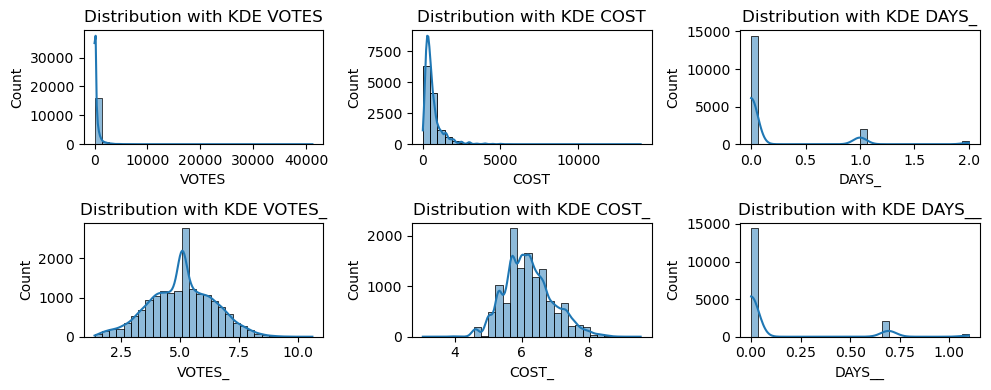

In [65]:
#plot to see difference 

plt.figure(figsize=(10, 4))

col_plt=['VOTES', 'COST', 'DAYS_','VOTES_', 'COST_', 'DAYS__']

for i, col in enumerate(col_plt,1):
    plt.subplot(2,3,i)
    sns.histplot(df_11[col], kde=True, bins=30)
    plt.title(f'Distribution with KDE {col}')
    plt.tight_layout()

plt.show()



we can see that OPEN_ and DAYS_ have not changed much. and the data has a very odd distribution. these columns seem irrelevant so i will also drop them 

In [66]:
#print numerical difference
print('VOTES_ =', df_11['VOTES_'].skew())
print('COST_ =', df_11['COST_'].skew())
print('DAYS__ =', df_11['DAYS__'].skew())


VOTES_ = -0.017426721482738893
COST_ = 0.3971493783098499
DAYS__ = 2.217403173811177


In [67]:
drop_11=['OPEN_', 'HOURS_OPEN_', 'VOTES_', 'COST_', 'DAYS__']
df_11=df_11.drop(columns=drop_11)
df_11

,CITY,RATING,VOTES,GROUP_,TYPE_,TIME_,DAYS_,COST
0,11.0,3.6,49.0,2.0,4.0,838.0,0.0,1200.0
1,1.0,4.2,30.0,2.0,4.0,2170.0,0.0,1500.0
2,1.0,3.8,221.0,2.0,4.0,745.0,0.0,800.0
3,6.0,4.1,24.0,7.0,0.0,315.0,0.0,800.0
4,6.0,3.8,165.0,3.0,2.0,685.0,0.0,300.0
...,...,...,...,...,...,...,...,...
4226,7.0,3.9,287.0,2.0,4.0,260.0,0.0,NaN
4227,0.0,4.3,469.0,5.0,4.0,685.0,0.0,NaN
4228,9.0,3.7,53.0,7.0,4.0,2759.0,0.0,NaN
4229,5.0,3.8,164.0,7.0,1.0,569.0,2.0,NaN


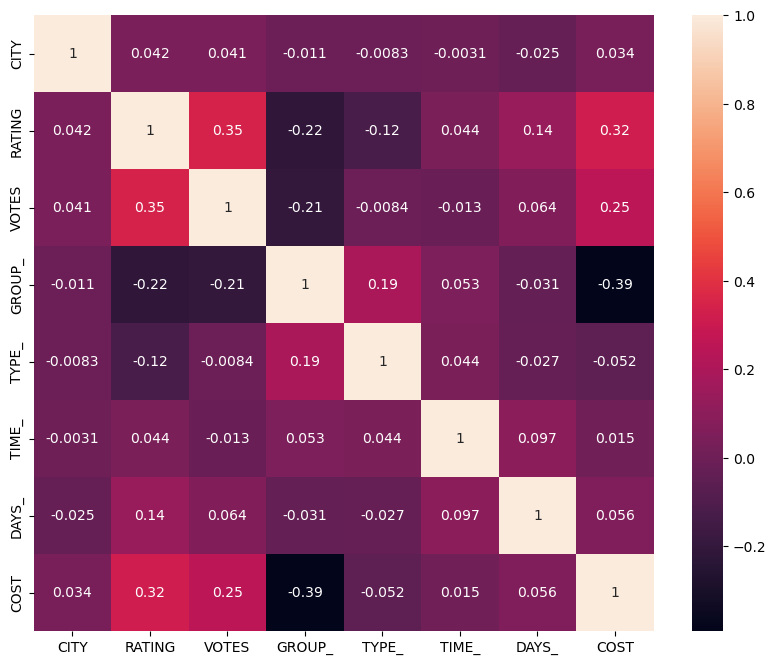

In [68]:
corr_=df_11.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_,annot=True)
plt.show()


as we can see that 'CITY', 'GROUP_', 'TYPE_' and  'TIME_' and 'DAYS' have negative correlations i will drop them for the model.

In [69]:
df_11

,CITY,RATING,VOTES,GROUP_,TYPE_,TIME_,DAYS_,COST
0,11.0,3.6,49.0,2.0,4.0,838.0,0.0,1200.0
1,1.0,4.2,30.0,2.0,4.0,2170.0,0.0,1500.0
2,1.0,3.8,221.0,2.0,4.0,745.0,0.0,800.0
3,6.0,4.1,24.0,7.0,0.0,315.0,0.0,800.0
4,6.0,3.8,165.0,3.0,2.0,685.0,0.0,300.0
...,...,...,...,...,...,...,...,...
4226,7.0,3.9,287.0,2.0,4.0,260.0,0.0,NaN
4227,0.0,4.3,469.0,5.0,4.0,685.0,0.0,NaN
4228,9.0,3.7,53.0,7.0,4.0,2759.0,0.0,NaN
4229,5.0,3.8,164.0,7.0,1.0,569.0,2.0,NaN


__IDENTIFY outliers__

# 7. Test and Train Data

In [70]:
check_col = ['COST']  

# Calculate IQR
Q1 = df_11[check_col].quantile(0.25)
Q3 = df_11[check_col].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
outlier_mask = ~((df_11[check_col] < (Q1 - 1.5 * IQR)) | (df_11[check_col] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered = df_11[outlier_mask]

print(f'Original DataFrame shape: {df_11.shape}')
print(f'Filtered DataFrame shape: {df_filtered.shape}')

Original DataFrame shape: (16921, 8)
Filtered DataFrame shape: (16059, 8)


In [71]:
train_df=df_filtered[df_filtered['COST'].notna()]

In [72]:
X=train_df.drop(columns=['COST','CITY', 'GROUP_', 'TYPE_', 'TIME_', 'DAYS_'])
Y=train_df['COST']

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [74]:
model=LinearRegression()
model.fit(X_train,Y_train)



LinearRegression()

In [78]:
Y_pred=model.predict(X_test)

mse=mean_squared_error(Y_test,Y_pred)

r2=r2_score(Y_test,Y_pred)

print('Mean Square Error =', {mse})
print('r^2 score =', {r2})


Mean Square Error = {91779.99154043864}
r^2 score = {0.1293270257508048}


Random forest 

In [80]:
#Random forest tree
rf_model=RandomForestRegressor(n_estimators=100, random_state=i )

In [96]:
RF_results=[]

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    
    rf_model.fit(X_train, Y_train)
    
    predict_train=rf_model.predict(X_train)
    predict_test=rf_model.predict(X_test)
    
    train_mse=mean_squared_error(Y_train,predict_train)
    test_mse=mean_squared_error(Y_test,predict_test)
        
    RF_results.append({
        'Random State': i,
        'Train MSE': train_mse,
        'Test MSE': test_mse
          })
RF_df=pd.DataFrame(RF_results)

RF_df_sort=RF_df.sort_values('Test MSE', ascending=False)
RF_df_sort


,Random State,Train MSE,Test MSE
399,400,37110.686406,115728.752852
166,167,37300.100295,114834.681818
440,441,36523.656765,114757.685435
263,264,36933.307186,114451.232100
134,135,37559.633010,113566.109226
...,...,...,...
445,446,39498.217446,97048.742855
324,325,39366.157234,96671.106752
290,291,39059.445708,96091.989196
97,98,39241.132012,95006.581457


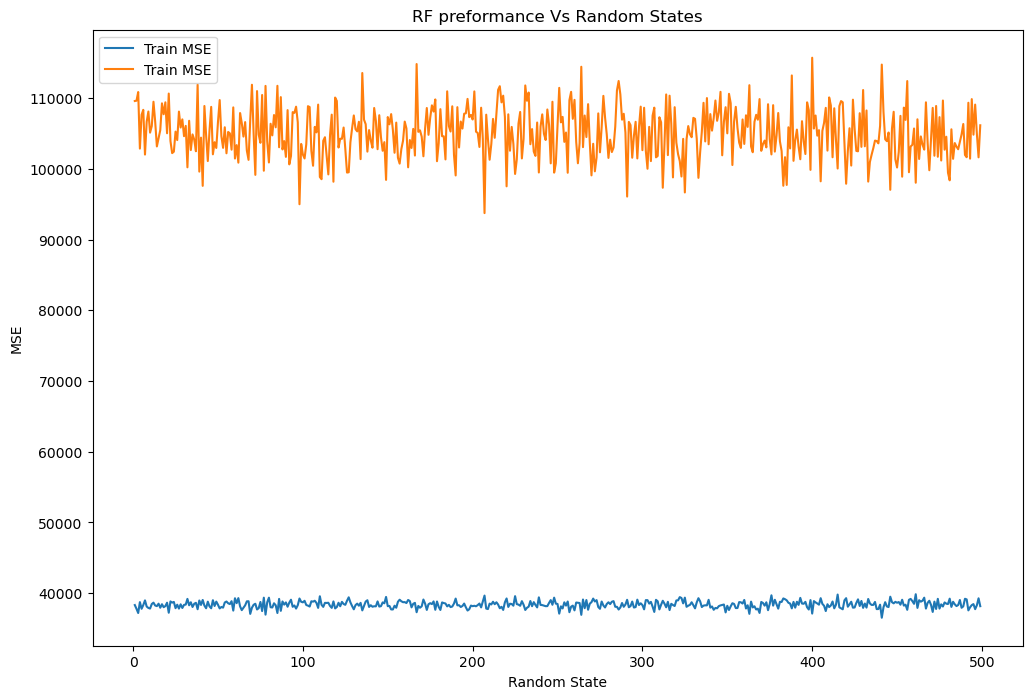

In [98]:
plt.figure(figsize=(12,8))
plt.plot(RF_df['Random State'],RF_df['Train MSE'],label='Train MSE')
plt.plot(RF_df['Random State'],RF_df['Test MSE'],label='Train MSE')
plt.title('RF preformance Vs Random States')
plt.xlabel('Random State')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [101]:
best_result=RF_df_sort.iloc[0]

print(f'Best Random State: {best_result["Random State"]}')
print(f'Best MSE:{best_result["Test MSE"]:.2f}' )

Best Random State: 400.0
Best MSE:115728.75


Decision tree